In [1]:
import qcodes as qc
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt

import transitions
from importlib import reload
reload(transitions )
from transitions import *

from qcodes.data import hdf5_format
reload(hdf5_format)
h5fmt = hdf5_format.HDF5Format()

pyqtgraph plotting not supported, try "from qcodes.plots.pyqtgraph import QtPlot" to see the full error


In [2]:
data = qc.load_data('Fast transition tracking data/#009_fast_transition_tracking_DFR_14-22-23')
# data = qc.load_data('Fast transition tracking data/#016_fast_transition_tracking_DFL_17-23-57')
data.formatter = h5fmt
data.read()
data

DataSet:
   location = 'Fast transition tracking data/#009_fast_transition_tracking_DFR_14-22-23'
   <Type>   | <array_id>         | <array.name>  | <array.shape>
   Setpoint | DBL_DBR_set        | DBL_DBR       | (100, 100, 100)
   Setpoint | DC_control_DFR_set | DFR           | (100,)
   Measured | DC_voltage         | DC_voltage    | (100, 100, 100)
   Setpoint | TGAC_set           | TGAC          | (100, 100)
   Setpoint | time_set           | time          | (100, 10000)
   Measured | trace_voltage      | trace_voltage | (100, 10000)

In [3]:
x = data.DBL_DBR_set[1,1,:] #DBL_DBR
y = data.TGAC_set[1,0:87] #TGAC   
w = data.DC_control_DFR_set[0:85]#DFR    
Z = data.DC_voltage[0:85,0:87,:]
# Z0 = Z[40,:,:]

# x = data.DBL_DBR_set[1,1,:] #DBL_DBR
# y = data.TGAC_set[1,:] #TGAC   
# w = data.DC_control_DFR_set[:]#DFR    
# Z = data.DC_voltage

slow = w
fast = x
TG  = y

# x = data.DBL_DBR_set[1,1,:] #DBL_DBR
# y = data.TGAC_set[1,:] #TGAC   
# w = data.DC_control_DFL_set[:]#DFR    
# Z = data.DC_voltage[:,:,:]
# Z0 = Z[99,:,:]

In [4]:
# find_transitions(fast,TG,Z0,plot='Complex')

In [5]:
n_w = w.shape[0]
n_x = x.shape[0]
M = np.zeros((n_x,n_w))
X_trans = np.zeros((n_w,1))
grad_trans = np.zeros((n_w,1))
alltrans = []
for i in range(n_w):
    transitions = find_transitions(Z[i,:,:],x,y)
    alltrans.append(transitions)
    X_trans[i,0] = x[transitions[0]['location']];
    grad_trans[i] = transitions[0]['gradient'];
    for k in range(len(transitions)):
        M[transitions[k]['location'],i] = transitions[k]['gradient']
        
W = np.ones((n_w,2))
W[:,0] = w
r = np.linalg.lstsq(W,X_trans)


ValueError: convolve2d inputs must both be 2D arrays

IndexError: list index out of range

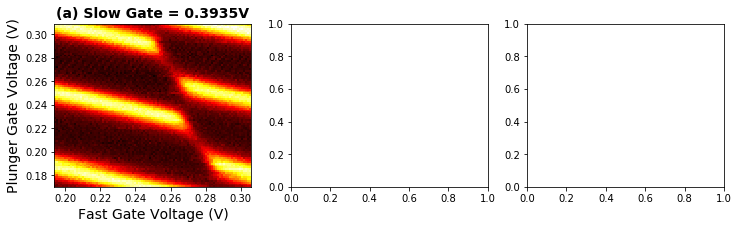

In [6]:
fig,(ax0,ax1,ax2) = plt.subplots(1, 3, figsize=[12,3])
# fig.suptitle('Figure 5: Slow Gate Capacitive Coupling', fontsize=20, fontweight='semibold')

ax0.pcolormesh(x, y, Z[12,:,:], cmap='hot')
ax0.set_xlabel('Fast Gate Voltage (V)', fontsize=14)
ax0.set_ylabel('Plunger Gate Voltage (V)', fontsize=14)
ax0.set_title('(a) Slow Gate = 0.3935V', fontsize=14, fontweight='semibold')

x_base = x[alltrans[12][0]['location']]+0.0075
yvals = ax0.get_ylim()
xvals = [x_base, x_base]
xvals[1] += (yvals[1] - yvals[0]) /alltrans[12][0]['gradient']
ax0.plot(xvals, yvals, linewidth=6,color='lawngreen')


ax1.pcolormesh(x, y, Z[43,:,:], cmap='hot')
ax1.set_xlabel('Fast Gate Voltage (V)', fontsize=14)
ax1.yaxis.set_ticklabels([])
ax1.set_title('(b) Slow Gate = 0.3982V', fontsize=14, fontweight='semibold')

x_base = x[alltrans[43][0]['location']]+0.0075
yvals = ax1.get_ylim()
xvals = [x_base, x_base]
xvals[1] += (yvals[1] - yvals[0]) /alltrans[43][0]['gradient']
ax1.plot(xvals, yvals, linewidth=6,color='magenta')


ax2.pcolormesh(x, y, Z[72,:,:], cmap='hot')
ax2.set_xlabel('Fast Gate Voltage (V)', fontsize=14)
ax2.yaxis.set_ticklabels([])
ax2.set_title('(c) Slow Gate = 0.4026V', fontsize=14, fontweight='semibold')

x_base = x[alltrans[72][0]['location']]+0.0075
yvals = ax2.get_ylim()
xvals = [x_base, x_base]
xvals[1] += (yvals[1] - yvals[0]) /alltrans[72][0]['gradient']
ax2.plot(xvals, yvals, linewidth=6,color='lightskyblue')


fig,ax3 = plt.subplots(1, 1, figsize=[12,8])
ax3.plot(w,X_trans,linewidth=6)#pcolormesh(w,x[20:99],M[20:99,:],cmap='gray')#w,x[20:99],
# ax3.set_title('h', fontsize=14, fontweight='semibold')
ax3.set_ylabel('Transition Fast Gate Voltage (V)', fontsize=14)
ax3.set_xlabel('Slow Gate Voltage (V)', fontsize=14);
ax3.set_title('(d) Slow Gate Voltage vs. Transition Position', fontsize=14, fontweight='semibold')
ax3.scatter(w[12],x[alltrans[12][0]['location']],linewidth=20,color='lawngreen')
ax3.scatter(w[43],x[alltrans[43][0]['location']],linewidth=20,color='magenta')
ax3.scatter(w[72],x[alltrans[72][0]['location']],linewidth=20,color='lightskyblue')

xvals = np.array(ax3.get_xlim())
yvals = xvals*r[0][0]+r[0][1]
ax3.plot(xvals,yvals,linestyle = '--', linewidth=3,color='red')

plt.show()

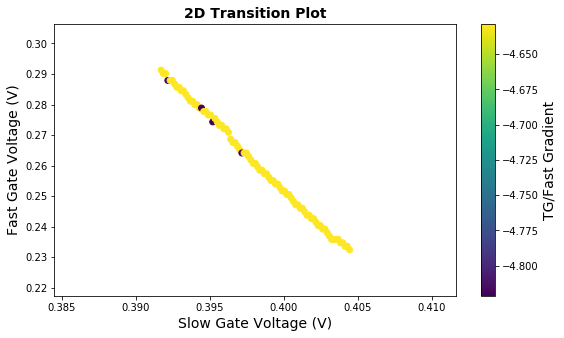

In [95]:
trans = find_transitions_2D(slow,fast,TG,Z)
fit = track_transitions_single(slow,fast,TG,Z,trans)
plot_transitions_2D(slow,fast,TG,Z,trans)